In [438]:
import pandas as pd

In [439]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math
from scipy.stats import variation

In [440]:
%matplotlib inline
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")

In [441]:
import sklearn
from sklearn.metrics import mean_squared_error

In [442]:
df = pd.read_csv('/Users/barry/CodeAcademy/Ideal_dataset/updated_hourly_csv/hourly_106.csv')

In [443]:
df = df.iloc[-1000:]

In [444]:
display(df.head())

,time,kettle,microwave,fridgefreezer,washingmachine,hot-water-hot-pipe,hot-water-cold-pipe,gas,shower,mains,...,temperature_2m (°C),relative_humidity_2m (%),weather_code (wmo code),wind_speed_10m (km/h),wind_direction_10m (°),day,hour,electric_combined_1W_lagged,electric-combined,electric_combined_1h_forecast
8425,2018-05-03 20:00:00,2959.0,0.0,0.0,0.0,56272,34076.0,0.0,449.0,15901.0,...,9.2,81,3,24.0,204,3,20,21.78,16.58,7.31
8426,2018-05-03 21:00:00,0.0,0.0,0.0,0.0,41752,27064.0,0.0,330.0,6565.0,...,9.4,83,3,22.9,208,3,21,4.13,7.31,3.75
8427,2018-05-03 22:00:00,0.0,0.0,0.0,0.0,36564,30202.0,0.0,319.0,2846.0,...,9.6,85,3,21.9,210,3,22,2.39,3.75,4.26
8428,2018-05-03 23:00:00,0.0,0.0,0.0,0.0,36504,33927.0,0.0,355.0,2226.0,...,9.7,86,3,20.9,212,3,23,4.43,4.26,4.33
8429,2018-05-04 00:00:00,0.0,0.0,0.0,0.0,34994,33660.0,0.0,394.0,2606.0,...,10.0,87,3,18.9,215,4,0,7.00,4.33,6.21


lets ditch the forecast column

In [445]:
df.drop(columns=['electric_combined_1h_forecast'], inplace = True)

In [446]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 8425 to 9424
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   time                         1000 non-null   object 
 1   kettle                       1000 non-null   float64
 2   microwave                    1000 non-null   float64
 3   fridgefreezer                1000 non-null   float64
 4   washingmachine               1000 non-null   float64
 5   hot-water-hot-pipe           1000 non-null   int64  
 6   hot-water-cold-pipe          1000 non-null   float64
 7   gas                          1000 non-null   float64
 8   shower                       1000 non-null   float64
 9   mains                        1000 non-null   float64
 10  cooker                       1000 non-null   float64
 11  central-heating-flow         1000 non-null   float64
 12  central-heating-return       1000 non-null   float64
 13  temperature_2m 

In [447]:
df.time = pd.to_datetime(df.time).dt.to_period('h')

In [448]:
df.index = df.time

In [449]:
df_electric = pd.DataFrame(df['electric-combined'])

In [450]:
display(df_electric.head())

,electric-combined
time,
2018-05-03 20:00,16.58
2018-05-03 21:00,7.31
2018-05-03 22:00,3.75
2018-05-03 23:00,4.26
2018-05-04 00:00,4.33


In [451]:
train_len = int(len(df_electric) - 200)
train = df_electric[:train_len]
test = df_electric[train_len:]


In [452]:
train.shape

(800, 1)

In [453]:
test.shape

(200, 1)

In [454]:
train_mean = np.mean(train)
train_mean

10.4300125

In [455]:
train_std = np.std(train)
train_std

electric-combined    16.064968
dtype: float64

In [456]:
train_CoV = train_std/train_mean
train_CoV

electric-combined    1.540264
dtype: float64

In [457]:
CoV = pd.DataFrame({'Mean' : train_mean, 'Std_Dev' : train_std, 'Coeff_of_Var' : train_CoV})
CoV

,Mean,Std_Dev,Coeff_of_Var
electric-combined,10.430013,16.064968,1.540264


In [458]:
df.index.dtype

period[h]

In [459]:
df_electric.head(1)

,electric-combined
time,
2018-05-03 20:00,16.58


In [460]:
df_electric.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 1000 entries, 2018-05-03 20:00 to 2018-06-14 11:00
Freq: h
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   electric-combined  1000 non-null   float64
dtypes: float64(1)
memory usage: 15.6 KB


In [461]:
df_electric.index = df_electric.index.to_timestamp()

In [487]:
df_electric.head()

,electric-combined
time,
2018-05-03 20:00:00,16.58
2018-05-03 21:00:00,7.31
2018-05-03 22:00:00,3.75
2018-05-03 23:00:00,4.26
2018-05-04 00:00:00,4.33


In [489]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_electric['electric-combined'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -6.025416
p-value: 0.000000


In [491]:
from statsmodels.tsa.stattools import kpss

kpss_test = kpss(df_electric)

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 1.239168
Critical Values @ 0.05: 0.46
p-value: 0.010000


In [462]:
df_electric.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2018-05-03 20:00:00 to 2018-06-14 11:00:00
Freq: h
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   electric-combined  1000 non-null   float64
dtypes: float64(1)
memory usage: 15.6 KB


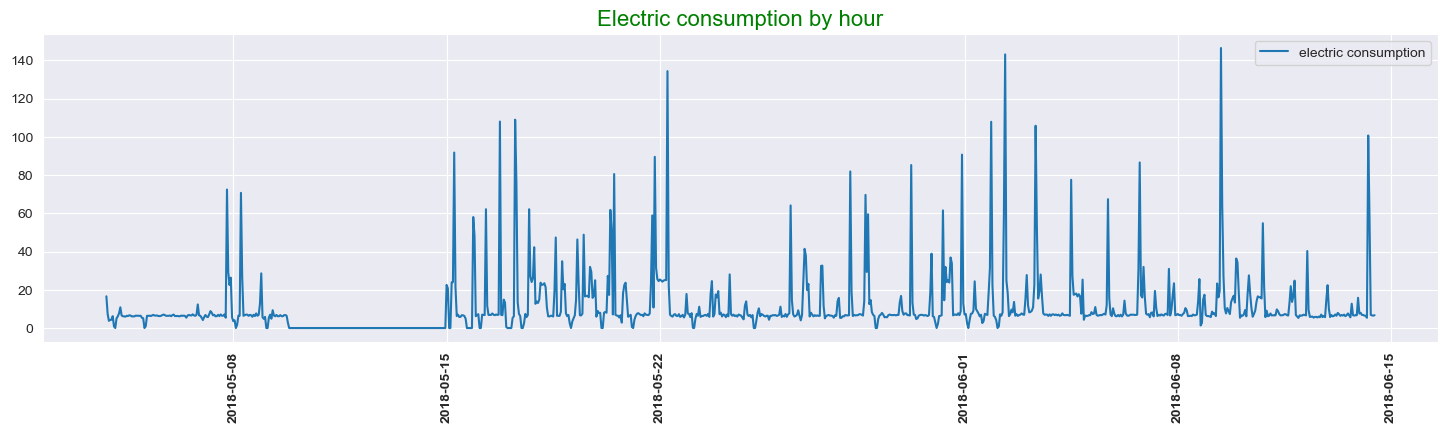

In [463]:
plt.figure(figsize=(18,4))
plt.plot(df_electric, label='electric consumption')
plt.legend(loc='best')
plt.title('Electric consumption by hour', fontdict={'fontsize': 16, 'fontweight' : 5, 'color' : 'Green'})
plt.xticks(rotation = 90,fontweight="bold")
plt.show()

Additive seasonal decomposition



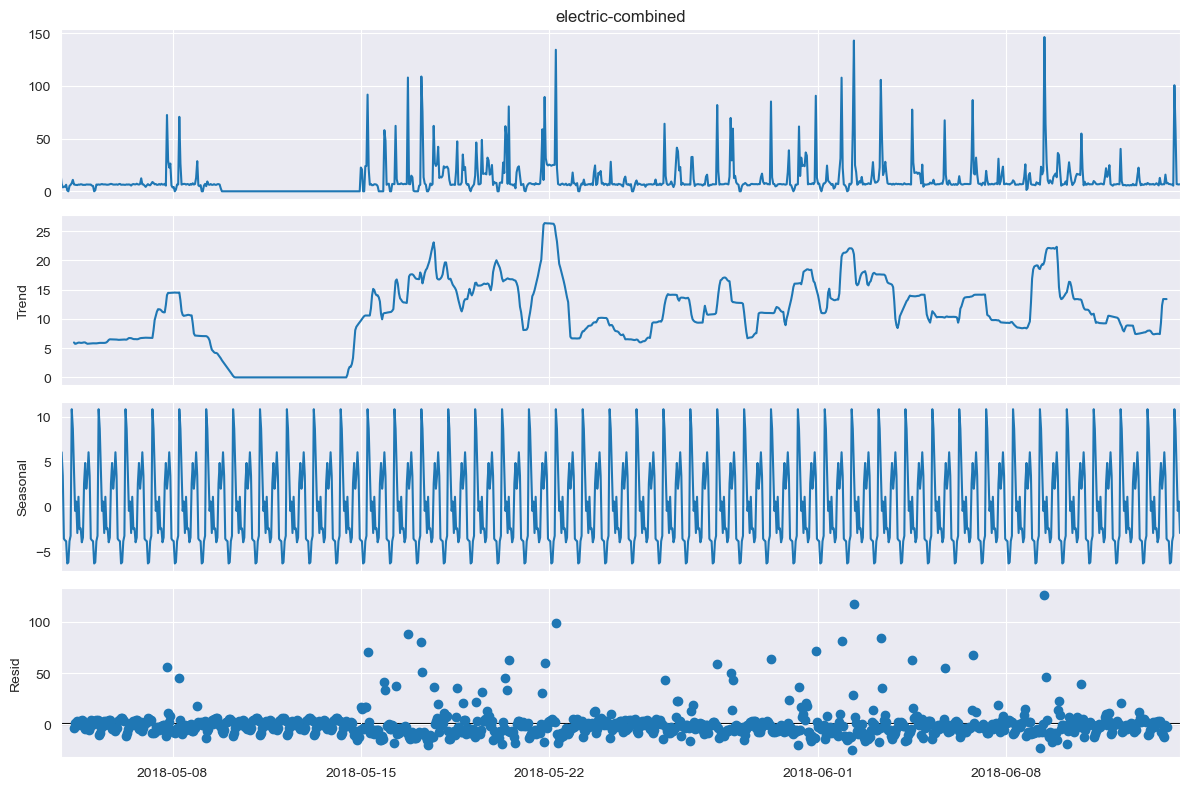

In [464]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(df_electric['electric-combined'], model='additive') # additive seasonal index
fig = decomposition.plot()
plt.show()

Multiplicative seasonal decomposition



In [465]:
# decomposition = sm.tsa.seasonal_decompose(df_electric['electric-combined'], model='multiplicative') # multiplicative seasonal index
# fig = decomposition.plot()
# plt.show()

Multiplicative seasonal decomposition does not seem appropriate for me - : ValueError: Multiplicative seasonality is not appropriate for zero and negative values

In [466]:
train_len = int(len(df_electric) -200)
train = df_electric[:train_len]
test = df_electric[train_len:]

Simple time series methods

In [467]:
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['electric-combined'][train_len-1]

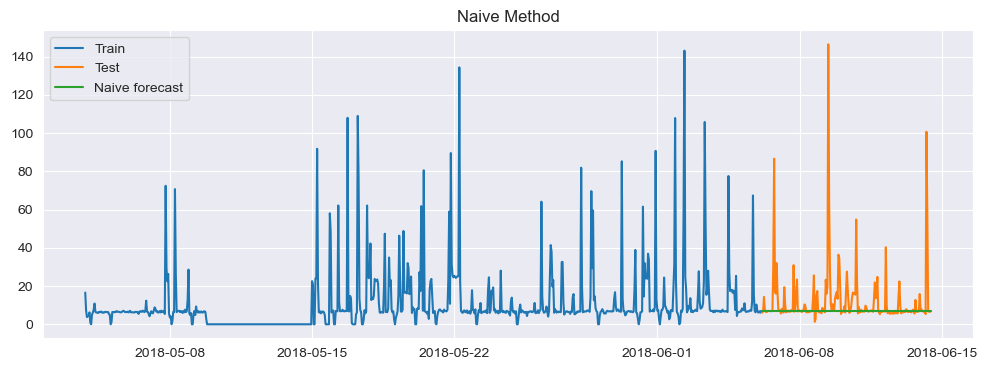

In [468]:
# Plot train, test and forecast

plt.figure(figsize=(12,4))
plt.plot(train['electric-combined'], label='Train')
plt.plot(test['electric-combined'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

In [469]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['electric-combined'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['electric-combined']-y_hat_naive['naive_forecast'])/test['electric-combined'])*100,2)

results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,16.21,27.16


Simple average method


In [470]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['electric-combined'].mean()

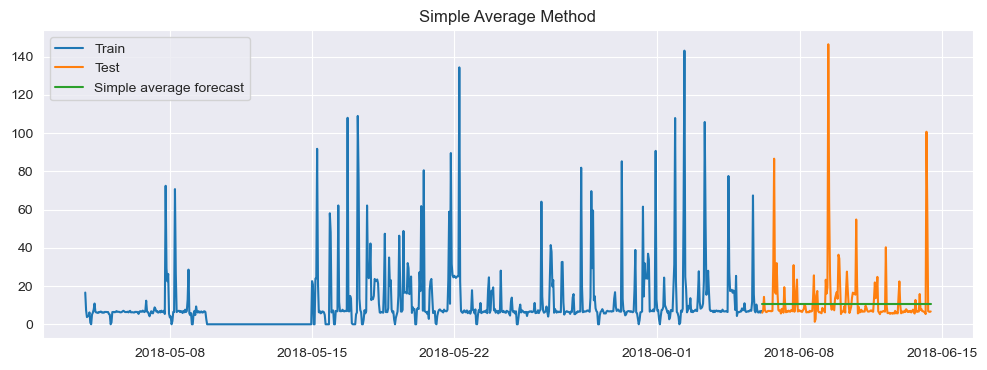

In [471]:
# Plot train, test and forecast

plt.figure(figsize=(12,4))
plt.plot(train['electric-combined'], label='Train')
plt.plot(test['electric-combined'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()

In [472]:
# Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['electric-combined'], y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['electric-combined']-y_hat_avg['avg_forecast'])/test['electric-combined'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple average method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,16.21,27.16
0,Simple average method,15.46,56.08


Simple moving average method


In [473]:
y_hat_sma = df_electric.copy()
ma_window = 12
y_hat_sma['sma_forecast'] = df_electric['electric-combined'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

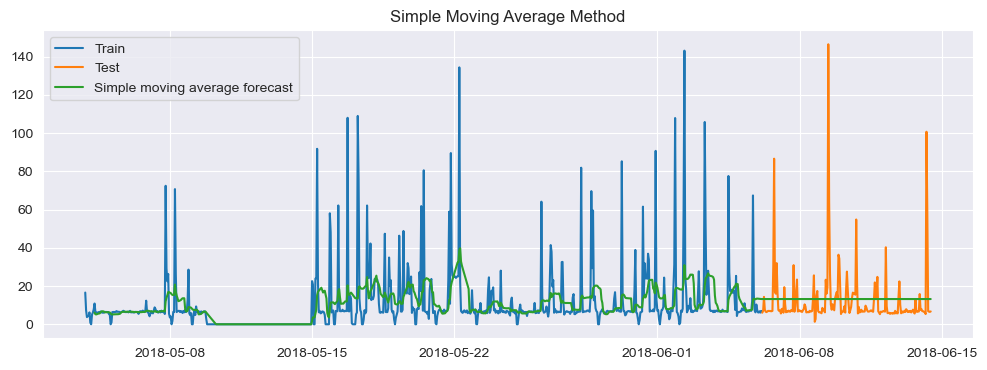

In [474]:
# Plot train, test and forecast

plt.figure(figsize=(12,4))
plt.plot(train['electric-combined'], label='Train')
plt.plot(test['electric-combined'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

In [475]:
# Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['electric-combined'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['electric-combined']-y_hat_sma['sma_forecast'][train_len:])/test['electric-combined'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple moving average forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,16.21,27.16
0,Simple average method,15.46,56.08
0,Simple moving average forecast,15.40,84.26


Exponential Smoothing Techniques


Simple exponential smoothing


In [476]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['electric-combined'])
model_fit = model.fit(optimized=True)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(len(test))

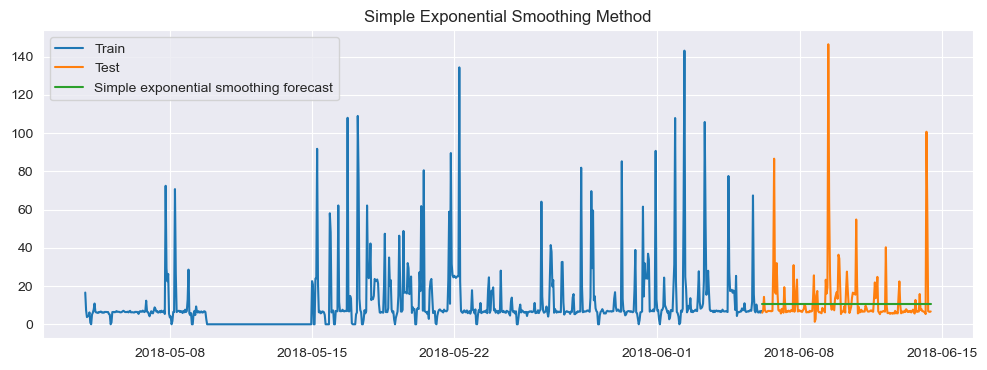

In [477]:
# Plot train, test, forecast

plt.figure(figsize=(12,4))
plt.plot(train['electric-combined'], label='Train')
plt.plot(test['electric-combined'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

In [478]:
# Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['electric-combined'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['electric-combined']-y_hat_ses['ses_forecast'])/test['electric-combined'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple exponential smoothing forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive method,16.21,27.16
0,Simple average method,15.46,56.08
0,Simple moving average forecast,15.40,84.26
0,Simple exponential smoothing forecast,15.42,59.74


Holt's method with trend


In [479]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['electric-combined']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.05213922760778936, 'smoothing_trend': 7.769852794155182e-11, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 6.108270785609142, 'initial_trend': 0.006356634855018739, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


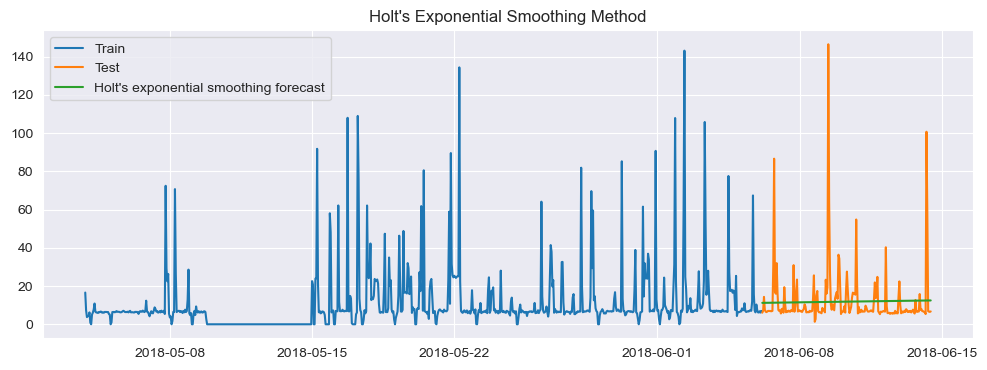

In [480]:
# Plot train, test, forecast

plt.figure(figsize=(12,4))
plt.plot( train['electric-combined'], label='Train')
plt.plot(test['electric-combined'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

In [481]:
# Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['electric-combined'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['electric-combined']-y_hat_holt['holt_forecast'])/test['electric-combined'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,16.21,27.16
0,Simple average method,15.46,56.08
0,Simple moving average forecast,15.40,84.26
0,Simple exponential smoothing forecast,15.42,59.74
0,Holt's exponential smoothing method,15.38,70.61


Holt Winters' additive method with trend and seasonality


In [482]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['electric-combined']) ,seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.05427739583740229, 'smoothing_trend': 0.005061408017126513, 'smoothing_seasonal': 0.02603991547375364, 'damping_trend': nan, 'initial_level': 7.7887586904605515, 'initial_trend': 0.006244374413337724, 'initial_seasons': array([ 3.94005371,  3.0398217 ,  0.54908225, -4.01425512, -1.05243971,
       -2.73824298, -3.97487764, -4.94702537, -3.31716967, -0.53824621,
        9.27449063,  6.65041937]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


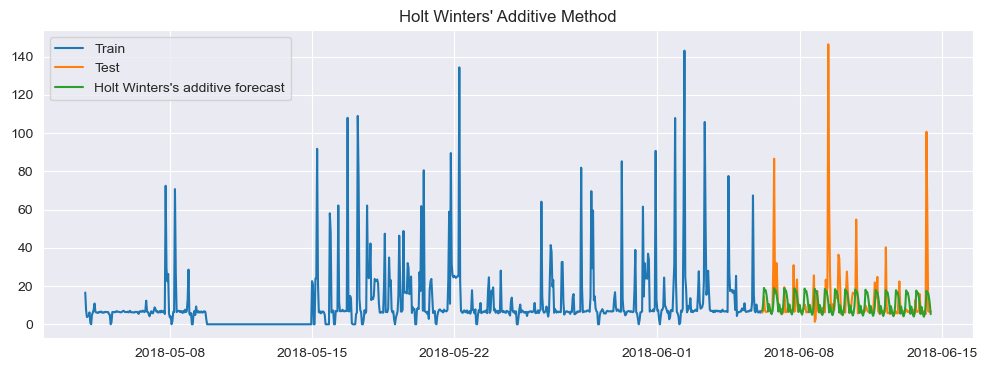

In [483]:
# Plot train, test, forecast

plt.figure(figsize=(12,4))
plt.plot( train['electric-combined'], label='Train')
plt.plot(test['electric-combined'], label='Test')
plt.plot(y_hat_hwa['hw_forecast'], label='Holt Winters\'s additive forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Additive Method')
plt.show()

In [484]:
# Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['electric-combined'], y_hat_hwa['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['electric-combined']-y_hat_hwa['hw_forecast'])/test['electric-combined'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,16.21,27.16
0,Simple average method,15.46,56.08
0,Simple moving average forecast,15.40,84.26
0,Simple exponential smoothing forecast,15.42,59.74
0,Holt's exponential smoothing method,15.38,70.61
0,Holt Winters' additive method,15.10,59.60


In [485]:
y_hat_hwm = test.copy()
model = ExponentialSmoothing(np.asarray(train['electric-combined']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['hw_forecast'] = model_fit.forecast(len(test))

ValueError: endog must be strictly positive when usingmultiplicative trend or seasonal components.